In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
import glob
from skimage.transform import downscale_local_mean
import os

Maximum number of samples is 4368, minimum number of samples 1736 , average 2740.7998230088497


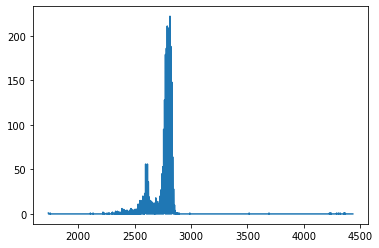

There are only 12.0 with bigger size than 2900


In [2]:
path_to_dataset = "/home/melanie/Desktop/Reconstructing_Space_with_Time/DATASETS_DEPTH_IMAGE_ECHO_RECORDINGS/Dataset_5000_setup_Day1"


depthMaps=sorted(glob.glob(f"{path_to_dataset}/SOUND_ECHO_and_DEPTH/DEPTH_MAPS/FILTERED_DEPTH_MAPS/*.png"))
audios=sorted(glob.glob(f"{path_to_dataset}/SOUND_ECHO_and_DEPTH/SOUND_RECORDINGS/NPY/*.npy"))
wavs=sorted(glob.glob(f"{path_to_dataset}/SOUND_ECHO_and_DEPTH/SOUND_RECORDINGS/WAV/*.wav"))
imgs = sorted(glob.glob(f"{path_to_dataset}/SOUND_ECHO_and_DEPTH/DEPTH_MAPS/USED_IMAGES/*.png"))

thresh=0.08


# lets see whcih is the maximum sound sample number to pad all the rest to this size
max_size=0
min_size=10000
av=0
sizes=np.zeros((2700))
for audio_path,depth_im_path,wav_path,im_path in zip(audios, depthMaps, wavs, imgs):
    audio = np.load(audio_path)
    audio = audio[100:]
    audio = audio[int(np.argwhere(np.abs(audio)>np.max(np.abs(audio))*thresh)[0]):]
    if False and len(audio)<max_size:
        plt.plot(audio)
        plt.show()
        print(len(audio))
    min_size = min(min_size, len(audio))
    max_size = max(max_size, len(audio))
    av += len(audio)
    sizes[len(audio)-1736]+=1
    if False and (np.sum(np.abs(audio)>10000)<50 or len(audio)<3000): # then they are outliers
        plt.plot(audio)
        plt.show()
        er=input("Erase?")
        if er=="y":
            print("erased!")
            os.remove(depth_im_path)
            os.remove(audio_path)
            os.remove(wav_path)
            os.remove(im_path)

print(f"Maximum number of samples is {max_size}, minimum number of samples {min_size} , average {av/len(audios)}")
plt.plot(np.arange(2700)+1736, sizes)
plt.show()
print(f"There are only {np.sum(sizes[(2900-1736):])} with bigger size than 2900")

In [3]:
reduce_audio_length_by = 2
reduce_h_w_image_by = 8

size_audio=2900

In [4]:
h5f = h5py.File(f"{path_to_dataset}/Dataset.h5", 'a') # append if exists, create if not


for idx, (audio_path, image_path) in enumerate(zip(audios, depthMaps)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # take audio part from the point where stuff begins
    audio = np.load(audio_path)
    audio = audio[100:]
    audio = audio[int(np.argwhere(np.abs(audio)>np.max(np.abs(audio))*thresh)[0]):]
    
    # first pad audio to correct size
    if len(audio)>size_audio:
        audio = audio[:size_audio]
    if len(audio)<size_audio:
        audio = np.pad( audio, (0, size_audio-len(audio)))
        
    if reduce_audio_length_by !=1:
        audio = downscale_local_mean( audio, (reduce_audio_length_by,))
    if reduce_h_w_image_by!=1:
        image = downscale_local_mean( image, (reduce_h_w_image_by, reduce_h_w_image_by))
    
    h5f.create_dataset(f"{idx}_aud", data=audio, compression="lzf", shuffle=True) 
    h5f.create_dataset(f"{idx}_im", data=image, compression="lzf", shuffle=True) 
    if idx%500==0:
        print(idx)

h5f.flush()
h5f.close()

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500


In [5]:
h5f = h5py.File(f"{path_to_dataset}/Dataset.h5", 'r')

In [6]:
len(h5f)/2

5650.0

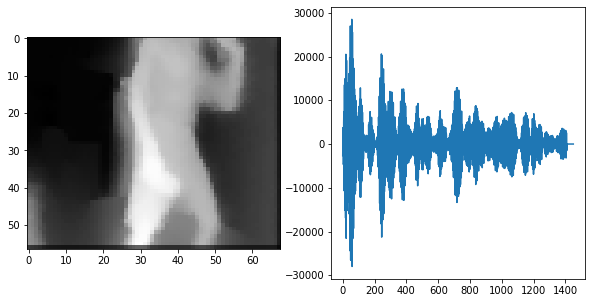

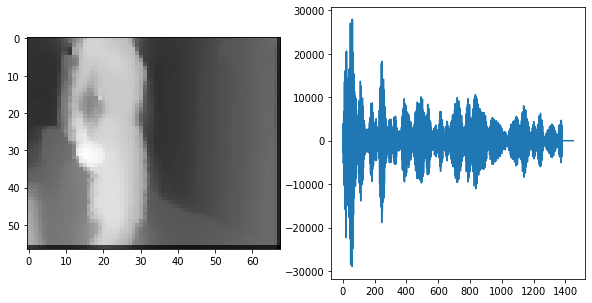

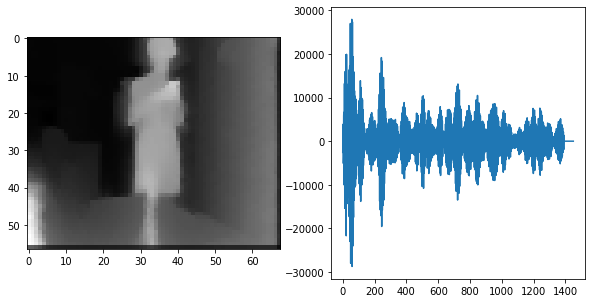

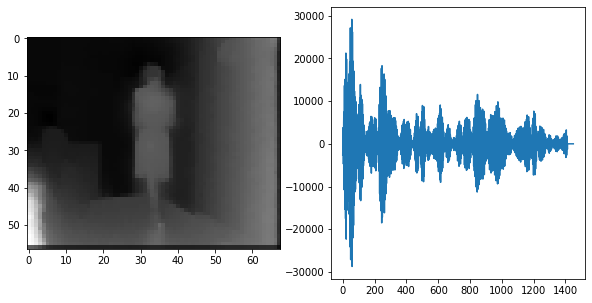

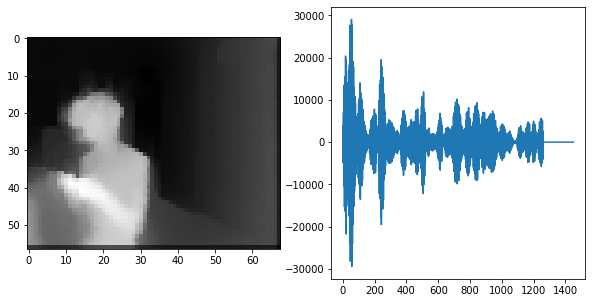

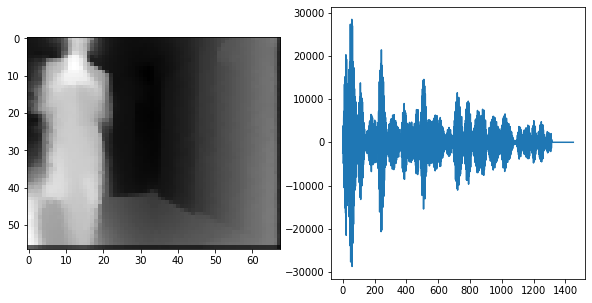

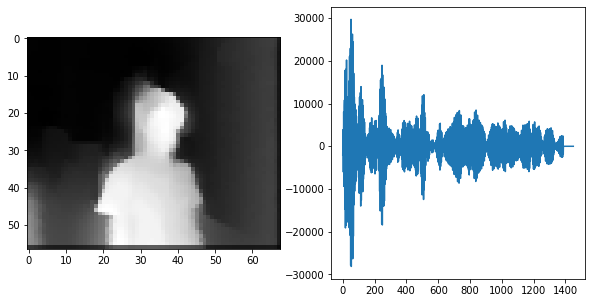

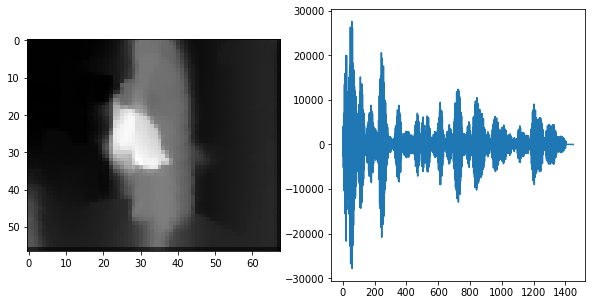

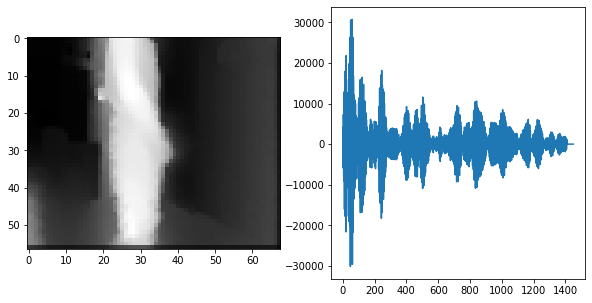

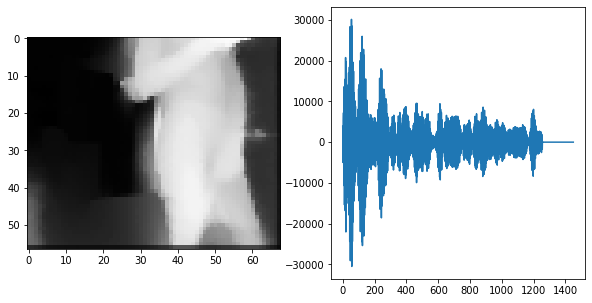

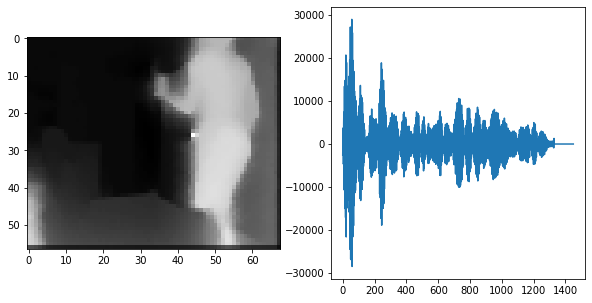

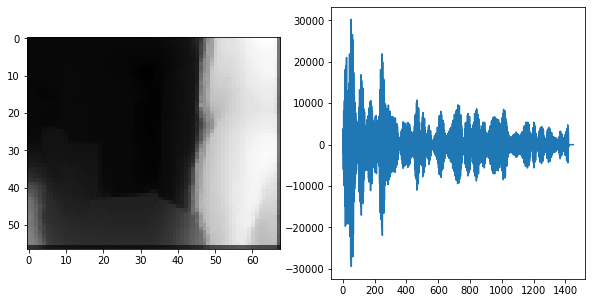

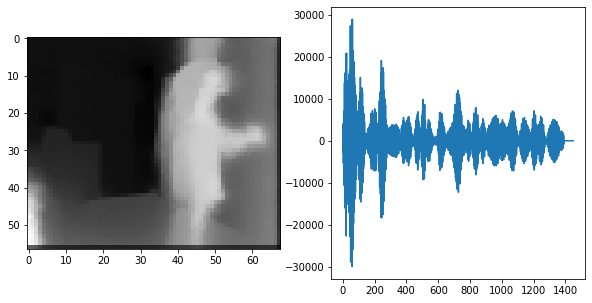

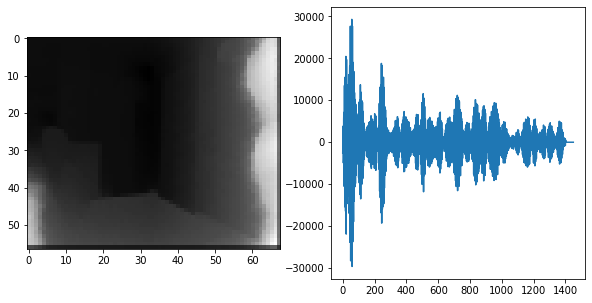

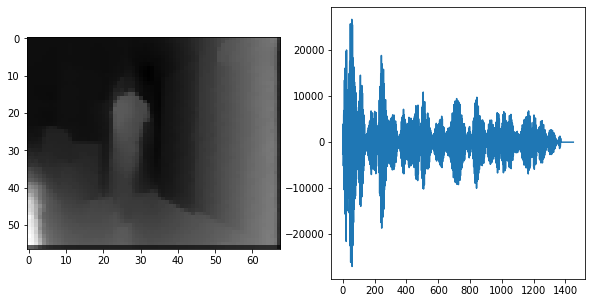

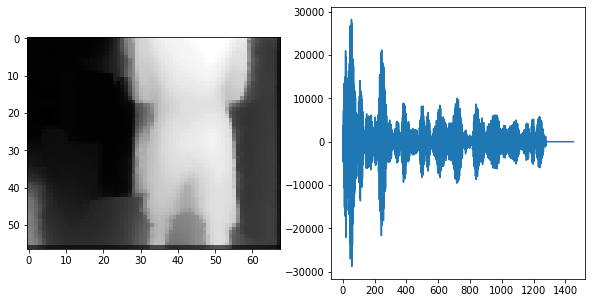

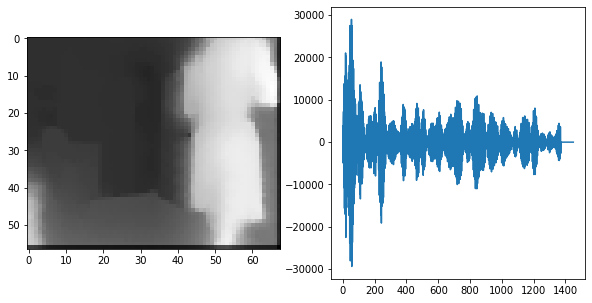

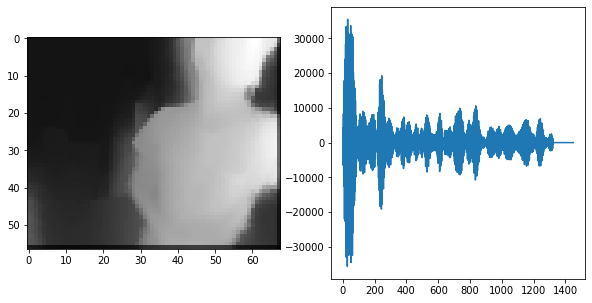

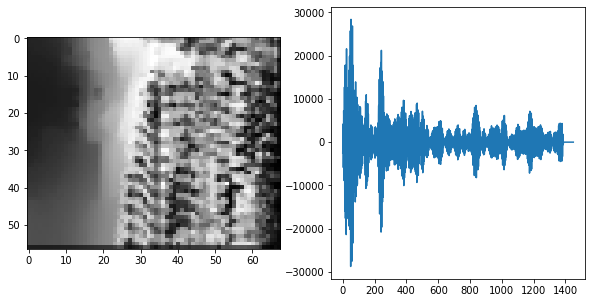

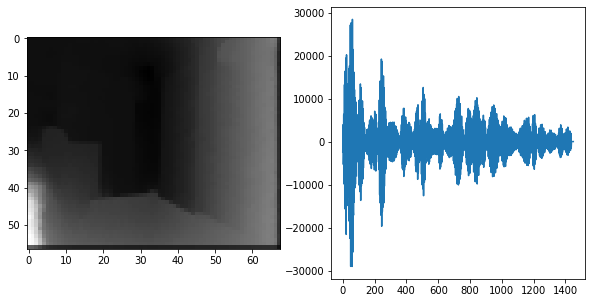

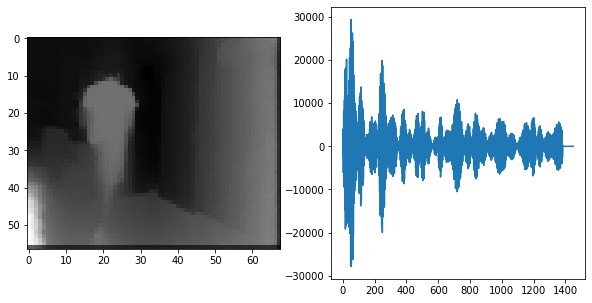

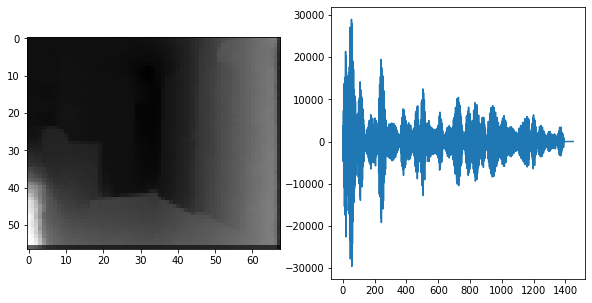

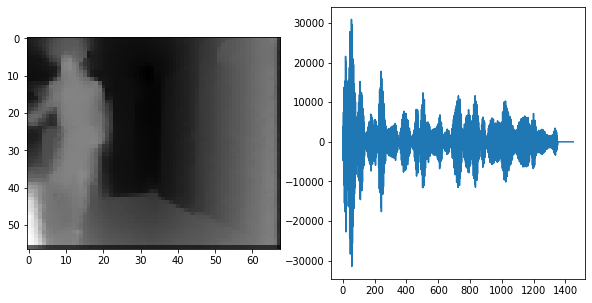

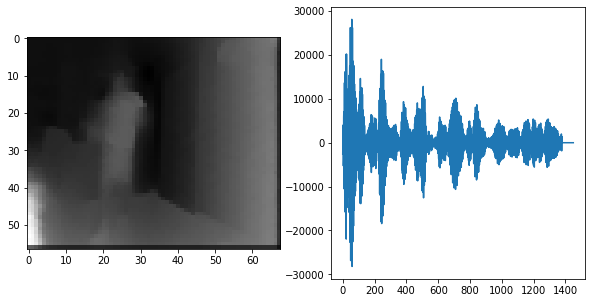

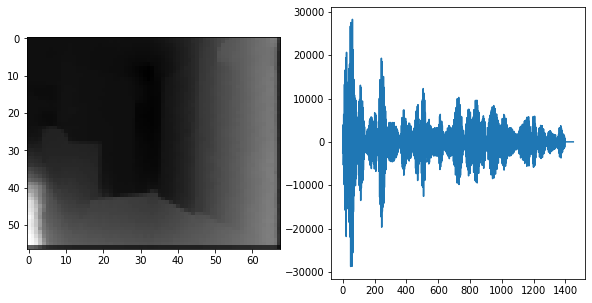

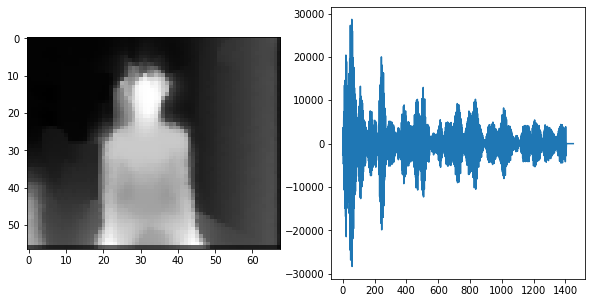

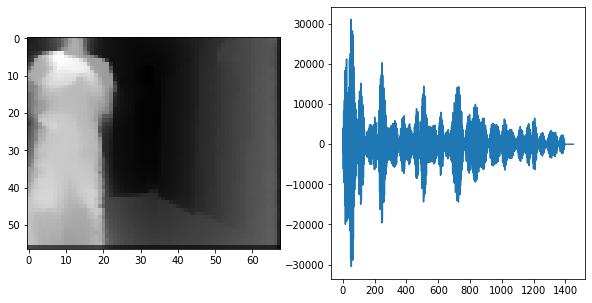

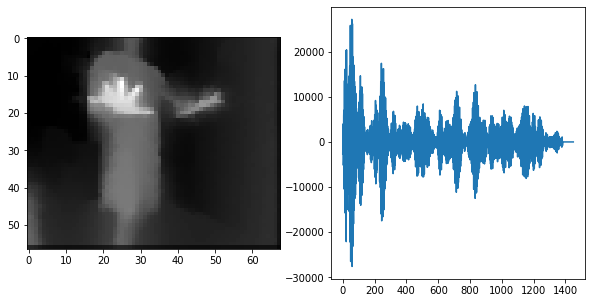

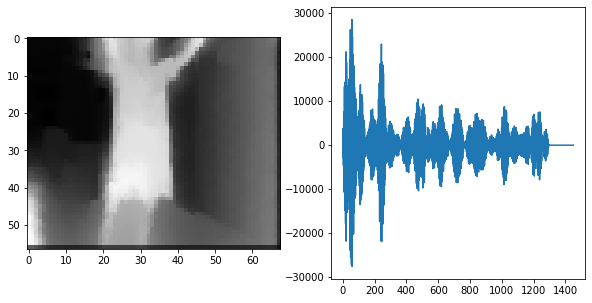

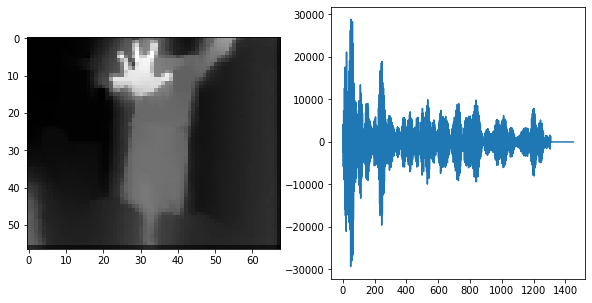

In [15]:
for i in np.random.randint(0, len(h5f)/2, 30):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    axs[0].imshow(h5f[f"{i}_im"], cmap='gray')
    axs[1].plot(np.array(h5f[f"{i}_aud"]))
    plt.show()

In [16]:
h5f.close()

In [17]:
h5f = h5py.File(f"{path_to_dataset}/Dataset.h5", 'r')

In [18]:
for i in range(10):
    print(h5f[f"{i}_im"].shape)

(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)
(57, 68)


In [19]:
h5f.close()